# Real-coded Genetic Algorithms:RCGA(自数値GA)

目的関数

In [1]:
import copy
import time
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
def plot_graph(X, Y, Z, gm, title):
    fig = plt.figure(figsize=(12, 4))
    fig.suptitle(title)
    ax1 = plt.subplot2grid((1, 3), (0, 0), colspan=2, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='coolwarm')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    ax2 = plt.subplot2grid((1, 3), (0, 2))
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.pcolormesh(X, Y, Z, cmap='coolwarm')
    ax2.scatter(*gm, marker='x', c="lightgreen")
    plt.show()

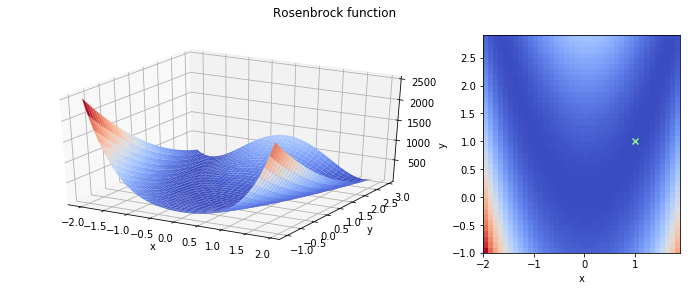

In [3]:
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2) ** 2

X, Y = np.meshgrid(np.arange(-2, 2, 0.1), np.arange(-1, 3, 0.1))
Z = rosenbrock(X, Y)
plot_graph(X, Y, Z, (1, 1), title="Rosenbrock function")

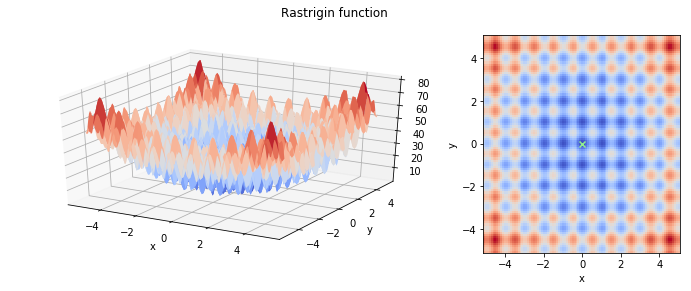

In [4]:
def rastrigin(x, y, A=10):
    return 2*A + (x**2 - A*np.cos(2*np.pi*x)) + (y**2 - A*np.cos(2*np.pi*y))

X, Y = np.meshgrid(np.arange(-5.12, 5.12, 0.1), np.arange(-5.12, 5.12, 0.1))
Z = rastrigin(X, Y)
plot_graph(X, Y, Z, (0, 0), title="Rastrigin function")

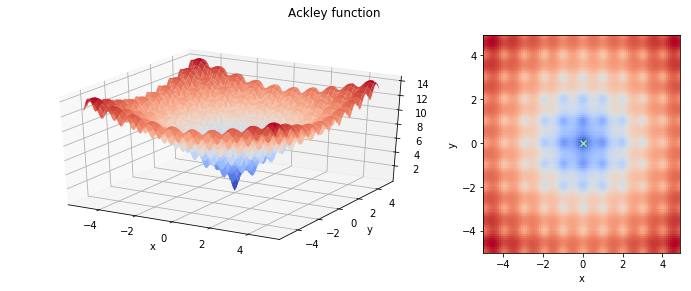

In [5]:
def Ackley(x, y):
    return 20+np.e \
            -20 * np.exp(-0.2 * np.sqrt(0.5*(x**2 + y**2))) \
            - np.exp(0.5 * (np.cos(2*np.pi*x) + np.cos(2*np.pi*y)))

X, Y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
Z = Ackley(X, Y)
plot_graph(X, Y, Z, (0, 0), title="Ackley function")

In [6]:
# parameter
obj_func = rastrigin
MAX_GENERATION = 10
NUM_CHROMOSOME = 100
MUT_PB = 0.05
CX_PB = 0.8

def get_chromosome():
    gene = np.random.random(2) * 5.12*2 - 5.12
    value = obj_func(*gene)
    fitness = -1.
    return {'gene': gene, 'value': value, 'fitness': fitness}

generation:1	 best:4.1547	 worst:12.6663	 mean:8.1569	 elapsed time:0.01 [sec]
generation:100	 best:0.0683	 worst:1.7986	 mean:0.2557	 elapsed time:0.40 [sec]
generation:200	 best:0.0224	 worst:1.1984	 mean:0.1516	 elapsed time:0.79 [sec]
generation:300	 best:0.0328	 worst:1.4403	 mean:0.2250	 elapsed time:1.19 [sec]
generation:400	 best:0.0251	 worst:0.8217	 mean:0.1848	 elapsed time:1.58 [sec]
generation:500	 best:0.0287	 worst:0.5223	 mean:0.1048	 elapsed time:1.97 [sec]
generation:600	 best:0.0124	 worst:0.6018	 mean:0.1258	 elapsed time:2.36 [sec]
generation:700	 best:0.0320	 worst:1.3837	 mean:0.2402	 elapsed time:2.75 [sec]
generation:800	 best:0.0172	 worst:0.6472	 mean:0.1445	 elapsed time:3.14 [sec]
generation:900	 best:0.0132	 worst:1.4433	 mean:0.2406	 elapsed time:3.53 [sec]
generation:1000	 best:0.0060	 worst:1.2138	 mean:0.1152	 elapsed time:3.92 [sec]


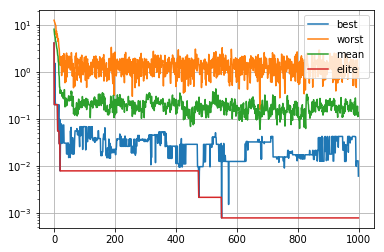

[0.00023216 0.00014333]


In [59]:
# simple GA
chromosomes = [get_chromosome() for _ in range(NUM_CHROMOSOME)]
# array for plot
means = []
worsts = []
bests = []
elites = []
start = time.time()
# save elite
elite_chromosome = get_chromosome()

for generation in range(1, MAX_GENERATION+1):
    # calc fitness
    values = [-ch['value'] for ch in chromosomes]
    value_min = min(values)
    value_max = max(values)
    value_delta = value_max - value_min if value_max - value_min > 0 else 1.0
    eps = np.random.rand()
    
    fitness_sum = 0.
    for ch in chromosomes:
        ch['fitness'] = (-ch['value'] - value_min) / value_delta * 100 + eps
        fitness_sum += ch['fitness']
    
    next_chromosomes = []
    for _ in range(NUM_CHROMOSOME//2):
        # select parents genes
        p_idx1, p_idx2 = np.random.choice(NUM_CHROMOSOME, size=2,
            p=[ch['fitness'] / fitness_sum for ch in chromosomes])
        gene1 = chromosomes[p_idx1]['gene']
        gene2 = chromosomes[p_idx2]['gene']
        
        # cross over
        if np.random.rand() <= CX_PB:
            next_gene1 = np.array([gene1[0], gene2[1]])
            next_gene2 = np.array([gene2[0], gene1[1]])
        else:
            next_gene1 = gene1
            next_gene2 = gene2
        
        # mutate
        if np.random.rand() <= MUT_PB:
            next_gene1 = next_gene1 + np.random.randn(2) / 10
        if np.random.rand() <= MUT_PB:
            next_gene2 = next_gene2 + np.random.randn(2) / 10
            
        next_chromosomes.append({
            'gene': next_gene1,
            'value': obj_func(*next_gene1),
            'fitness': -1.
        })
        next_chromosomes.append({
            'gene': next_gene2,
            'value': obj_func(*next_gene1),
            'fitness': -1.
        })
    
    if len(next_chromosomes) != len(chromosomes):
        raise ValueError('old chromosomes length is not new chromosomes')
    chromosomes = next_chromosomes
    
    # calc summary
    mean_value  = sum([ch['value'] for ch in chromosomes]) / NUM_CHROMOSOME
    worst_value = max([ch['value'] for ch in chromosomes])
    best_value  = min([ch['value'] for ch in chromosomes])
    means.append(mean_value)
    worsts.append(worst_value)
    bests.append(best_value)
    
    # save elite
    best_chromosome = sorted(chromosomes, key=lambda ch: ch['value'])[0]
    if elite_chromosome['value'] > best_chromosome['value']:
        elite_chromosome = best_chromosome
    elites.append(elite_chromosome['value'])

    # print summary
    if generation % 100 == 0 or generation == 1:
        print("generation:{gen}\t best:{best:.4f}\t worst:{worst:.4f}\t mean:{mean:.4f}\t elapsed time:{time:.2f} [sec]".format(
            gen=generation,
            best=best_value,
            worst=worst_value,
            mean=mean_value,
            time=time.time() - start))

# graph plot
plt.plot(bests, label="best")
plt.plot(worsts, label="worst")
plt.plot(means, label="mean")
plt.plot(elites, label="elite")
plt.grid()
plt.yscale('log')
plt.legend()
plt.show()

print(elite_chromosome['gene'])

generation:1	 best:4.0030	 worst:14.2697	 mean:10.1128	 elapsed time:0.01 [sec]
generation:100	 best:0.1589	 worst:14.1617	 mean:5.6446	 elapsed time:0.69 [sec]
generation:200	 best:0.0359	 worst:13.4622	 mean:2.9607	 elapsed time:1.40 [sec]
generation:300	 best:0.0007	 worst:13.4622	 mean:1.4462	 elapsed time:2.11 [sec]
generation:400	 best:0.0139	 worst:8.6202	 mean:0.7217	 elapsed time:2.85 [sec]
generation:500	 best:0.0094	 worst:4.4578	 mean:0.3155	 elapsed time:3.57 [sec]
generation:600	 best:0.0030	 worst:1.8299	 mean:0.1696	 elapsed time:4.27 [sec]
generation:700	 best:0.0064	 worst:0.7290	 mean:0.1234	 elapsed time:5.01 [sec]
generation:800	 best:0.0306	 worst:0.3999	 mean:0.1086	 elapsed time:5.74 [sec]
generation:900	 best:0.0549	 worst:0.1760	 mean:0.1028	 elapsed time:6.47 [sec]
generation:1000	 best:0.0281	 worst:0.1760	 mean:0.0989	 elapsed time:7.21 [sec]


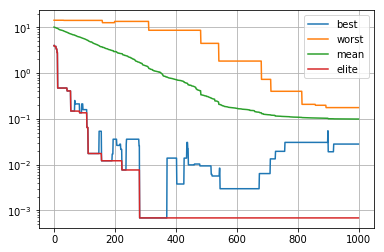

[-0.00019791  0.00013821]
[-0.00852722  0.00332149]


In [61]:
# UNDX
# 動かん
num_children = 50

def get_children(p1, p2, p3, a=0.5, b=0.35):
    m = (p1+p2) / 2.
    e1 = (p1-p2) / np.linalg.norm(p1-p2)
    d1 = np.linalg.norm(p1-p2)
    d2 = np.sqrt(
        np.linalg.norm(p1-p3)**2 * np.linalg.norm(p2-p3)**2 - ((p1-p3).T@(p2-p3))**2
    ) / d1
    sig1 = a * d1
    sig2 = b * d2 / np.sqrt(2)
    q, _ = np.linalg.qr(np.array([e1, p1+p2+p3]).T)
    e2 = q[1]
    try:
        z1 = np.random.normal(loc=0, scale=sig1**2)
        z2 = np.random.normal(loc=0, scale=sig2**2)
        c1 = np.clip(m + z1*e1 + z2*e2, -5.12, 5.12)
        c2 = np.clip(m - z1*e1 - z2*e2, -5.12, 5.12)
    except:
        print("vec", p1, p2, p3)
        print("e1", e1, "e2", e2)
        print("e2@e2", e1.T@e2)
        print("parm", "sig1", sig1, "sig2", sig2, "d1", d1, "d2", d2)
        raise ValueError("nan de?")
    return c1, c2

# init
chromosomes = [get_chromosome() for _ in range(NUM_CHROMOSOME)]
# array for plot
means = []
worsts = []
bests = []
elites = []
start = time.time()
# save elite
elite_chromosome = get_chromosome()

for generation in range(1, MAX_GENERATION+1):
    
    children_chromosomes = []
    
    # select parents
    p_idx1, p_idx2 = np.random.choice(NUM_CHROMOSOME, size=2, replace=False)
    p_gene1 = chromosomes[p_idx1]['gene']
    p_gene2 = chromosomes[p_idx2]['gene']
    
    # generate children
    for i in range(num_children):
        while True:
            p_idx3 = np.random.choice(NUM_CHROMOSOME)
            if not (p_idx1 == p_idx3 or p_idx2 == p_idx3):
                break
    
        p_gene3 = chromosomes[p_idx3]['gene']
        c_gene1, c_gene2 = get_children(p_gene1, p_gene2, p_gene3)
        
        children_chromosomes.append({
            'gene': c_gene1,
            'value': obj_func(*c_gene1),
            'fitness': -1.})
        children_chromosomes.append({
            'gene': c_gene2,
            'value': obj_func(*c_gene2),
            'fitness': -1.})
    
    # Survival Strategy!
    # get best child
    children_chromosomes = sorted(children_chromosomes, key=lambda ch:ch['value'])
    child_1 = children_chromosomes.pop(0)
    # get by roulette
    values = [-ch['value'] for ch in children_chromosomes]
    value_min = min(values)
    value_max = max(values)
    value_delta = value_max - value_min if value_max - value_min > 0 else 1.0
#     eps = np.random.rand()

    fitness_sum = 0.
    for ch in children_chromosomes:
        ch['fitness'] = (-ch['value'] - value_min) / value_delta
        fitness_sum += ch['fitness']
    
    c_idx1 = np.random.choice(num_children*2-1,
            p=[ch['fitness'] / fitness_sum for ch in children_chromosomes])
    child_2 = children_chromosomes[c_idx1]
    
    # replace
    
    chromosomes[p_idx1] = child_1
    chromosomes[p_idx2] = child_2

    # calc summary
    mean_value  = sum([ch['value'] for ch in chromosomes]) / NUM_CHROMOSOME
    worst_value = max([ch['value'] for ch in chromosomes])
    best_value  = min([ch['value'] for ch in chromosomes])
    means.append(mean_value)
    worsts.append(worst_value)
    bests.append(best_value)
    
    # save elite
    best_chromosome = sorted(chromosomes, key=lambda ch: ch['value'])[0]
    if elite_chromosome['value'] > best_chromosome['value']:
        elite_chromosome = best_chromosome
    elites.append(elite_chromosome['value'])

    # print summary
    if generation % 100 == 0 or generation == 1:
        print("generation:{gen}\t best:{best:.4f}\t worst:{worst:.4f}\t mean:{mean:.4f}\t elapsed time:{time:.2f} [sec]".format(
            gen=generation,
            best=best_value,
            worst=worst_value,
            mean=mean_value,
            time=time.time() - start))

# graph plot
plt.plot(bests, label="best")
plt.plot(worsts, label="worst")
plt.plot(means, label="mean")
plt.plot(elites, label="elite")
plt.grid()
plt.yscale('log')
plt.legend()
plt.show()

print(elite_chromosome['gene'])
print(best_chromosome['gene'])

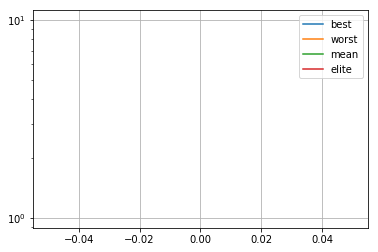

In [8]:
# 
# 
num_children = 50

def get_children(p1, p2, p3, a=0.5, b=0.35):
    pass
# init
chromosomes = [get_chromosome() for _ in range(NUM_CHROMOSOME)]
# array for plot
means = []
worsts = []
bests = []
elites = []
start = time.time()
# save elite
elite_chromosome = get_chromosome()

for generation in range(1, MAX_GENERATION+1):
    
    children_chromosomes = []

#     # calc summary
#     mean_value  = sum([ch['value'] for ch in chromosomes]) / NUM_CHROMOSOME
#     worst_value = max([ch['value'] for ch in chromosomes])
#     best_value  = min([ch['value'] for ch in chromosomes])
#     means.append(mean_value)
#     worsts.append(worst_value)
#     bests.append(best_value)
    
#     # save elite
#     best_chromosome = sorted(chromosomes, key=lambda ch: ch['value'])[0]
#     if elite_chromosome['value'] > best_chromosome['value']:
#         elite_chromosome = best_chromosome
#     elites.append(elite_chromosome['value'])

#     # print summary
#     if generation % 100 == 0 or generation == 1:
#         print("generation:{gen}\t best:{best:.4f}\t worst:{worst:.4f}\t mean:{mean:.4f}\t elapsed time:{time:.2f} [sec]".format(
#             gen=generation,
#             best=best_value,
#             worst=worst_value,
#             mean=mean_value,
#             time=time.time() - start))

# graph plot
plt.plot(bests, label="best")
plt.plot(worsts, label="worst")
plt.plot(means, label="mean")
plt.plot(elites, label="elite")
plt.grid()
plt.yscale('log')
plt.legend()
plt.show()

# print(elite_chromosome['gene'])
# print(best_chromosome['gene'])

In [ ]:
def cross_rex(pdf=np.random.normal, k=)

(20, 2)


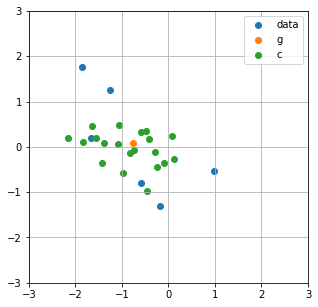

In [150]:
n = 2
k = 2 * n
sig = 1 / (n+k)

xs = np.random.randn(n+k, n)
x_g = data.mean(axis=0)
xis = np.random.normal(scale=sig, size=(20, n+k))
x_c = x_g + xis @ (xs - x_g)
print(x_c.shape)

plt.figure(figsize=(5,5))
plt.scatter(*data.T, label='data')
plt.scatter(*x_g, label='g')
plt.scatter(*x_c.T, label='c')
plt.grid()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.show()